## Time series forecasting for products
### World Wide Web Products Inc.
#### Data Source: https://www.kaggle.com/felixzhao/productdemandforecasting

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np


In [3]:
data= pd.read_csv('../data/external/product.csv',parse_dates=["Date"])
data.tail()


,Product_Code,Warehouse,Product_Category,Date,Order_Demand
1048570,Product_1791,Whse_J,Category_006,2016-04-27,1000
1048571,Product_1974,Whse_J,Category_006,2016-04-27,1
1048572,Product_1787,Whse_J,Category_006,2016-04-28,2500
1048573,Product_0901,Whse_J,Category_023,2016-10-07,50
1048574,Product_0704,Whse_J,Category_001,2016-06-27,4


In [4]:
data.isnull().sum()

Product_Code            0
Warehouse               0
Product_Category        0
Date                11239
Order_Demand            0
dtype: int64

In [5]:
# As the Date column has null values we dont require that particular columns, lets drop them
data.dropna(inplace=True)

In [6]:
data.shape

(1037336, 5)

In [7]:
data['Order_Demand'] = data['Order_Demand'].replace( '[\$,),(]','', regex=True ).astype(float)
data.head()

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
0,Product_0993,Whse_J,Category_028,2012-07-27,100.0
1,Product_0979,Whse_J,Category_028,2012-01-19,500.0
2,Product_0979,Whse_J,Category_028,2012-02-03,500.0
3,Product_0979,Whse_J,Category_028,2012-02-09,500.0
4,Product_0979,Whse_J,Category_028,2012-03-02,500.0


In [8]:
#checking if any duplicate rows existed or not
duplicateRowsDF = data[data.duplicated(['Date', 'Product_Code','Warehouse','Product_Category'])]
duplicateRowsDF.head()

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
10,Product_0979,Whse_J,Category_028,2012-08-29,500.0
39,Product_1159,Whse_J,Category_006,2012-08-30,50000.0
51,Product_1157,Whse_J,Category_006,2012-03-08,150000.0
55,Product_1157,Whse_J,Category_006,2012-06-04,160000.0
67,Product_1274,Whse_J,Category_019,2012-01-24,1000.0


In [9]:
# Replacing the duplicate rows with the mean
data=data.groupby(['Date','Product_Code','Warehouse','Product_Category'])['Order_Demand'].mean().reset_index()
data.head()

,Date,Product_Code,Warehouse,Product_Category,Order_Demand
0,2011-01-08,Product_0965,Whse_A,Category_006,2.0
1,2011-05-31,Product_1724,Whse_A,Category_003,108.0
2,2011-06-24,Product_1521,Whse_S,Category_019,46000.0
3,2011-09-02,Product_1507,Whse_C,Category_019,1250.0
4,2011-09-27,Product_0608,Whse_C,Category_001,5.0


In [10]:
data.shape


(634553, 5)

In [11]:
data.drop_duplicates(keep='first', inplace=True)
data.shape

(634553, 5)

In [12]:
data[data.duplicated()].any()

Date                False
Product_Code        False
Warehouse           False
Product_Category    False
Order_Demand        False
dtype: bool

In [13]:
type(data.Date[0])

pandas._libs.tslibs.timestamps.Timestamp

In [14]:
data.tail()

,Date,Product_Code,Warehouse,Product_Category,Order_Demand
634548,2017-01-06,Product_1954,Whse_J,Category_001,3.0
634549,2017-01-06,Product_1970,Whse_J,Category_005,2000.0
634550,2017-01-09,Product_0250,Whse_C,Category_007,148.0
634551,2017-01-09,Product_0471,Whse_C,Category_015,30.0
634552,2017-01-09,Product_1904,Whse_C,Category_019,4000.0


In [15]:
data.shape

(634553, 5)

In [16]:
data.head()

,Date,Product_Code,Warehouse,Product_Category,Order_Demand
0,2011-01-08,Product_0965,Whse_A,Category_006,2.0
1,2011-05-31,Product_1724,Whse_A,Category_003,108.0
2,2011-06-24,Product_1521,Whse_S,Category_019,46000.0
3,2011-09-02,Product_1507,Whse_C,Category_019,1250.0
4,2011-09-27,Product_0608,Whse_C,Category_001,5.0


In [17]:
#Cleaning data
data['Order_Demand'] = data['Order_Demand'].replace( '[\$,),(]','', regex=True ).astype(float)
data.head()

,Date,Product_Code,Warehouse,Product_Category,Order_Demand
0,2011-01-08,Product_0965,Whse_A,Category_006,2.0
1,2011-05-31,Product_1724,Whse_A,Category_003,108.0
2,2011-06-24,Product_1521,Whse_S,Category_019,46000.0
3,2011-09-02,Product_1507,Whse_C,Category_019,1250.0
4,2011-09-27,Product_0608,Whse_C,Category_001,5.0


### Category vs order Demand

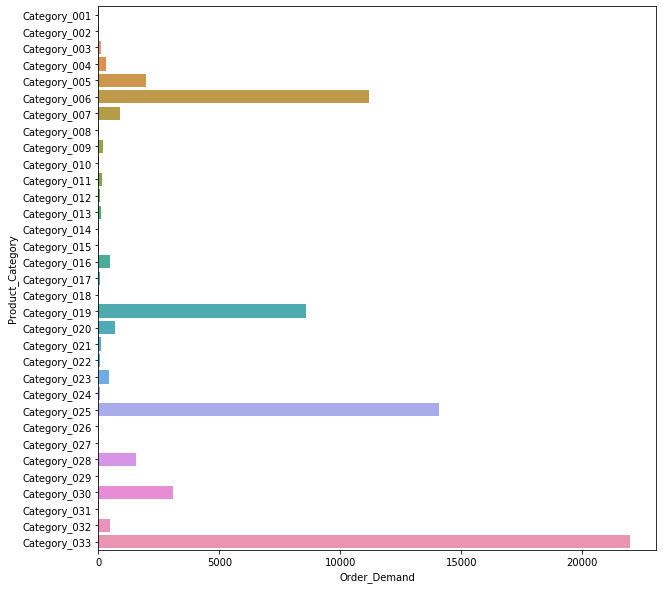

In [18]:
#Average order demand of each category:

avg_demand=data.groupby('Product_Category')['Order_Demand'].mean().reset_index()
plt.figure(figsize=(10,10))
ax = sns.barplot(x='Order_Demand',y='Product_Category',data=avg_demand.head(50))
ax.set(xlabel='Order_Demand', ylabel='Product_Category')
plt.show()

### Product vs Order demand

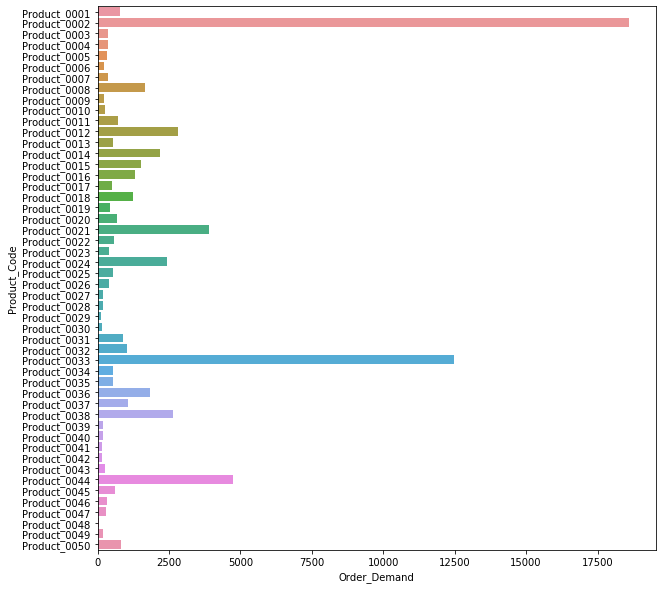

In [19]:
avg_demand_product=data.groupby('Product_Code')['Order_Demand'].mean().reset_index()
plt.figure(figsize=(10,10))
ax = sns.barplot(x='Order_Demand',y='Product_Code',data=avg_demand_product.head(50))
ax.set(xlabel='Order_Demand', ylabel='Product_Code')
plt.show()

### No of unique products sold by each warehouse

           Product_Code
Warehouse              
Whse_J             1625
Whse_S              553
Whse_A              427
Whse_C              244


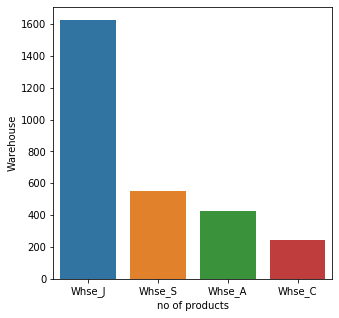

In [20]:
numberofproducts= data.groupby(['Warehouse'])['Product_Code'].nunique().sort_values(ascending= False).to_frame()
print(numberofproducts)
numberofproducts['Warehouse'] = numberofproducts.index.tolist()
numberofproducts.columns = ['Warehouse','no of products']
numberofproducts.index= np.arange(0,len(numberofproducts))
plt.figure(figsize=(5,5))
ax = sns.barplot(x='no of products',y='Warehouse',data=numberofproducts)
ax.set(xlabel='no of products', ylabel='Warehouse')
plt.show()

In [21]:
numberofhouses= data.groupby(['Product_Code'])['Warehouse'].nunique().sort_values(ascending= False).to_frame()
print(numberofhouses.head())


              Warehouse
Product_Code           
Product_0471          4
Product_0349          4
Product_0642          4
Product_1387          4
Product_2138          4


In [22]:
data['Date'].min(), data['Date'].max()

(Timestamp('2011-01-08 00:00:00'), Timestamp('2017-01-09 00:00:00'))

### considering one product whic is in most of the ware houses so as to forecast the demand from various warehouses

In [23]:
datamax = data[data['Product_Code'] == "Product_0471"].reset_index()

In [24]:
datamax.head()


,index,Date,Product_Code,Warehouse,Product_Category,Order_Demand
0,78,2011-12-12,Product_0471,Whse_C,Category_015,35.0
1,106,2011-12-14,Product_0471,Whse_A,Category_015,1.0
2,137,2011-12-16,Product_0471,Whse_A,Category_015,1.0
3,206,2011-12-21,Product_0471,Whse_A,Category_015,2.0
4,3235,2012-01-12,Product_0471,Whse_A,Category_015,1.0


In [25]:
boolean = any(data['Date'].duplicated())
boolean

True

In [26]:
datamaxforecasting2=datamax.drop(columns=['index','Product_Category','Product_Code'])
datamaxforecasting=datamax.drop(columns=['index','Product_Category','Product_Code'])
datamaxforecasting.head()

,Date,Warehouse,Order_Demand
0,2011-12-12,Whse_C,35.0
1,2011-12-14,Whse_A,1.0
2,2011-12-16,Whse_A,1.0
3,2011-12-21,Whse_A,2.0
4,2012-01-12,Whse_A,1.0


In [27]:
datamax=datamax.drop(columns=['index','Product_Category','Warehouse','Product_Code'])
datamax.head()

,Date,Order_Demand
0,2011-12-12,35.0
1,2011-12-14,1.0
2,2011-12-16,1.0
3,2011-12-21,2.0
4,2012-01-12,1.0


In [28]:
# indexing date
datamax.set_index('Date', inplace=True)
datamax.head()

,Order_Demand
Date,
2011-12-12,35.0
2011-12-14,1.0
2011-12-16,1.0
2011-12-21,2.0
2012-01-12,1.0


### Demand for the product analysis in various years

### Year 2012

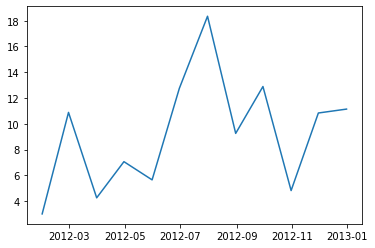

In [29]:
# Caluculating the monthly average of this product in the year 2012
datayear2012=datamax["2012"]
%matplotlib inline
plt.plot(datayear2012.Order_Demand.resample('M').mean())

### Year 2013

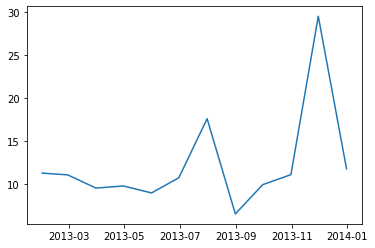

In [30]:
# Caluculating the monthly average of this product in the year 2013
datayear2013=datamax["2013"]
%matplotlib inline
plt.plot(datayear2013.Order_Demand.resample('M').mean())

### From years 2012 to 2017

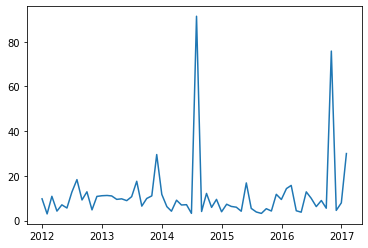

In [31]:
# Caluculating the monthly average of this product
%matplotlib inline
plt.plot(datamax.Order_Demand.resample('M').mean())

### FbProphet model for forecasting demand

In [32]:
from fbprophet import Prophet

In [33]:
datamaxforecasting = datamaxforecasting.rename(columns = {'Date': 'ds', 'Order_Demand': 'y' })

### Forecasting the orderdemant for different Warehouses of the product

### The demand is given between the years 2011 and 2017. Here we are trying to predict the future demand for the product i.e in 2018

### Here am trying to forecast the demand of the product for various warehouses

Prediction forWhse_A
            ds      yhat  yhat_lower  yhat_upper
720 2017-12-18  3.010639   -5.473406   12.571341
721 2017-12-19  4.033512   -4.622931   13.249737
722 2017-12-20  4.514066   -3.979937   13.692164
723 2017-12-21  5.133826   -4.552672   14.275547
724 2017-12-22  4.124309   -4.418448   13.140344
Prediction forWhse_C
            ds       yhat  yhat_lower  yhat_upper
471 2018-01-05  17.726898 -103.253279  149.654913
472 2018-01-06  30.267135  -92.250360  157.518375
473 2018-01-07  33.333839  -90.457679  153.562337
474 2018-01-08  42.926112  -83.128208  169.765742
475 2018-01-09  -3.314927 -130.765069  121.578872
Prediction forWhse_J
            ds      yhat  yhat_lower  yhat_upper
450 2017-12-02 -1.091254   -7.288749    5.080088
451 2017-12-03 -5.210166  -11.431483    1.043300
452 2017-12-04  0.333337   -5.798768    6.866467
453 2017-12-05  0.166532   -6.237536    5.993751
454 2017-12-06  0.510589   -5.638408    6.509348
Prediction forWhse_S
            ds       yhat  y

<Figure size 1296x432 with 0 Axes>

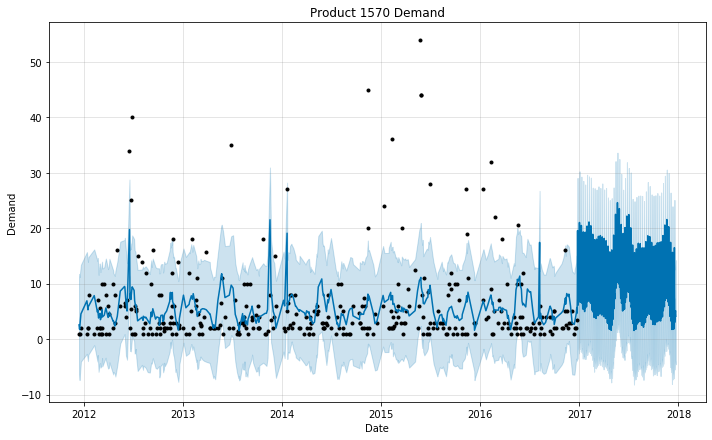

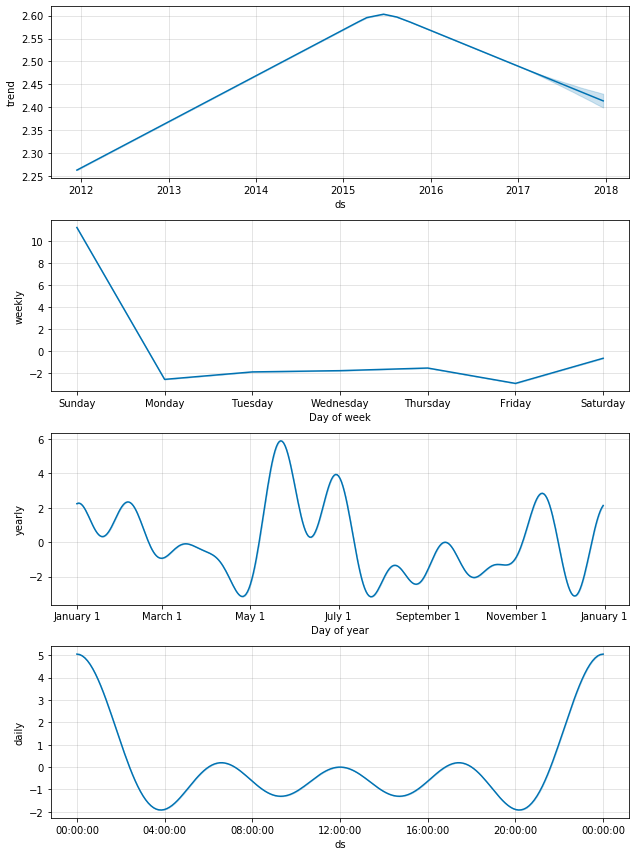

<Figure size 1296x432 with 0 Axes>

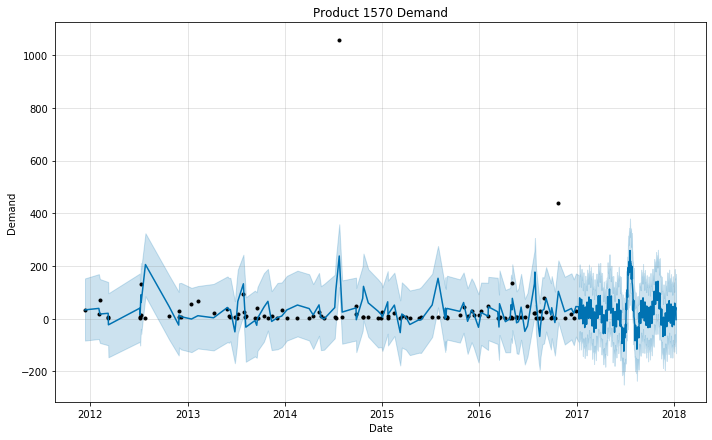

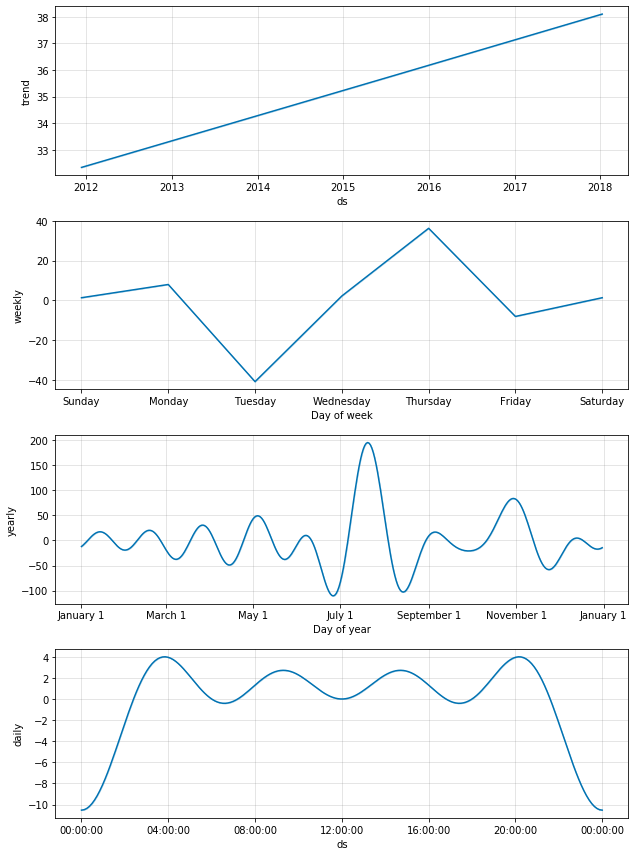

<Figure size 1296x432 with 0 Axes>

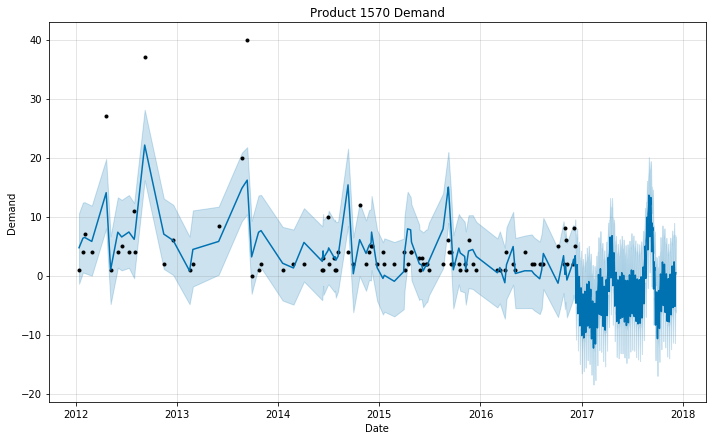

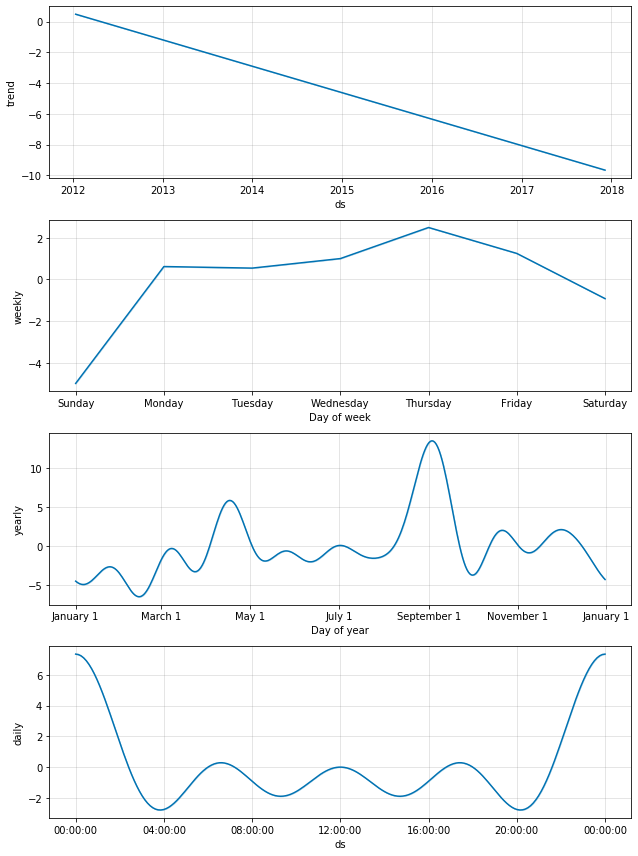

<Figure size 1296x432 with 0 Axes>

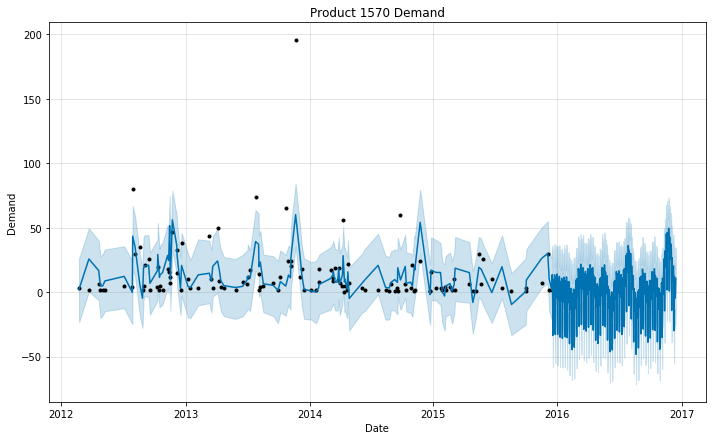

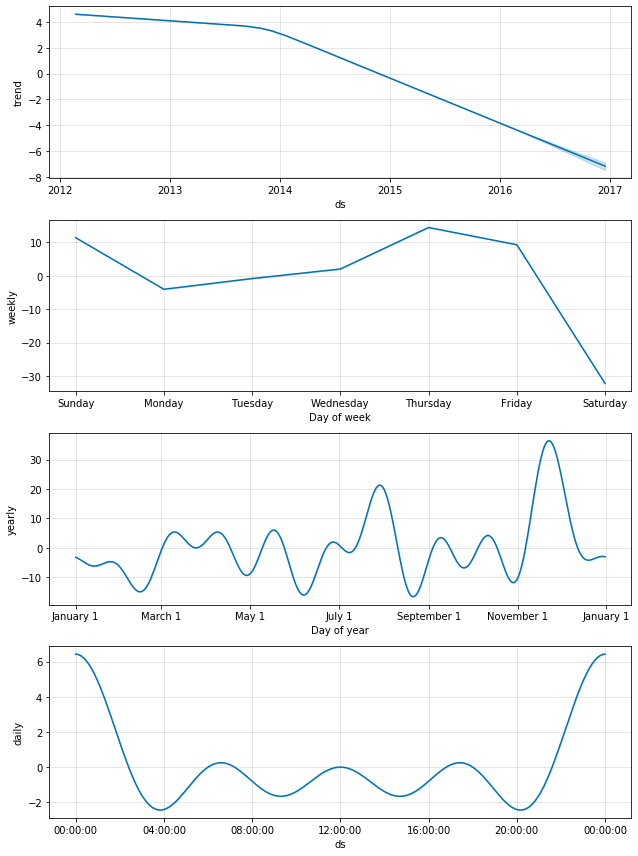

In [34]:
grouped = datamaxforecasting.groupby('Warehouse')
print(grouped)
for g in grouped.groups:
    group = grouped.get_group(g)
    m = Prophet(daily_seasonality=True)
    m.fit(group)
    future = m.make_future_dataframe(periods=365)
    forecast = m.predict(future)
    plt.figure(figsize=(18, 6))
    m.plot(forecast, xlabel = 'Date', ylabel = 'Demand')
    plt.title('Product 1570 Demand');
    m.plot_components(forecast)
    print("Prediction for"  + g)
    print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

    

### Analysis

#### For the product taken the trend and the fore cast components are caluculated 

#### 1. The trend for the product is different in all the warehouses
#### 2. On most of the saturdays the demand is very low
#### 3. The demand for the product is not at all same in all the warehouses.


### ARIMA model

In [35]:
from statsmodels.tsa.arima_model import ARIMA

In [36]:
model = ARIMA(datamaxforecasting2.Order_Demand, order=(1,1,2))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:         D.Order_Demand   No. Observations:                  683
Model:                 ARIMA(1, 1, 2)   Log Likelihood               -3587.407
Method:                       css-mle   S.D. of innovations             45.974
Date:                Fri, 13 Dec 2019   AIC                           7184.813
Time:                        01:45:49   BIC                           7207.446
Sample:                             1   HQIC                          7193.572
                                                                              
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0004      0.006     -0.066      0.947      -0.012       0.012
ar.L1.D.Order_Demand     0.9550      0.013     72.296      0.000       0.929       0.981
ma.L1.D.Orde

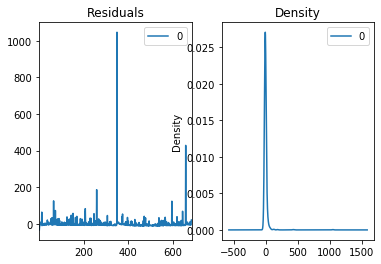

In [37]:
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

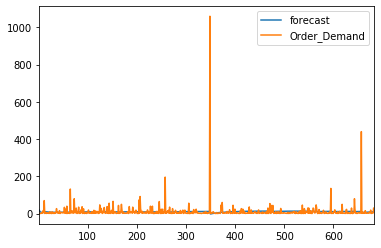

In [38]:
# Actual vs Fitted
model_fit.plot_predict(dynamic=False)
plt.show()